# Open loop simulation
Run the system model open loop and see how it behaves. 

In [1]:
#!/usr/bin/env python

from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

#Local files. 
from visualize_combination_code import *
from Simulate_combination_code import *
from utility_functions import *



Instantiate a truck object

In [6]:
##System initial conditions. 
truck_translation = array([np.float(18),np.float(5)])
truck_rotation = 0
first_trailer_rotation = 20
second_trailer_rotation = 20
destination_translation = array([4.5,5])
destination_rotation = 180
number_trailers = 2
step_size = 1e-2

rotation_center_truck = array([2.5,1])
rotation_center_first_trailer = array([1.5,1])
rotation_center_second_trailer = array([2.5,1])

truck_shape = array([7,2])
first_trailer_shape = array([2,2])
second_trailer_shape = array([9,2])

#Create a simulation given the initconditions provided. 
simulate_combination = Simulate_combination(truck_translation,\
                                            truck_rotation,\
                                            first_trailer_rotation,\
                                            second_trailer_rotation,\
                                            destination_translation,\
                                            destination_rotation,\
                                            number_trailers,\
                                            step_size)    


Simulate the system and save the outputs. 

In [29]:

truck_pos_x = []
truck_pos_y = []
truck_rot = [] 
trailer1_rot = []
trailer2_rot = []

for step_number in range(np.int(1e4)):
    
        #velocity = -0.1+np.sin(step_number/1e3*np.pi)
        steering_percentage = np.sin(step_number/1e2*np.pi)
        
        velocity  = -1
        #steering_percentage = 0
            
        truck_translation,\
        truck_rotation,\
        first_trailer_rotation,\
        second_trailer_rotation = simulate_combination.run(velocity,steering_percentage)
        
        truck_pos_x.append(truck_translation[0])
        truck_pos_y.append(truck_translation[1])
        truck_rot.append(truck_rotation)
        trailer1_rot.append(first_trailer_rotation)
        trailer2_rot.append(second_trailer_rotation)
        
        

Plots and analysis 

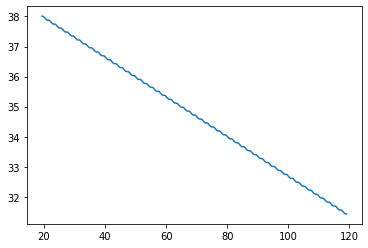

In [30]:
#truck_translation[]
plt.plot(truck_pos_x, truck_pos_y)

Animations

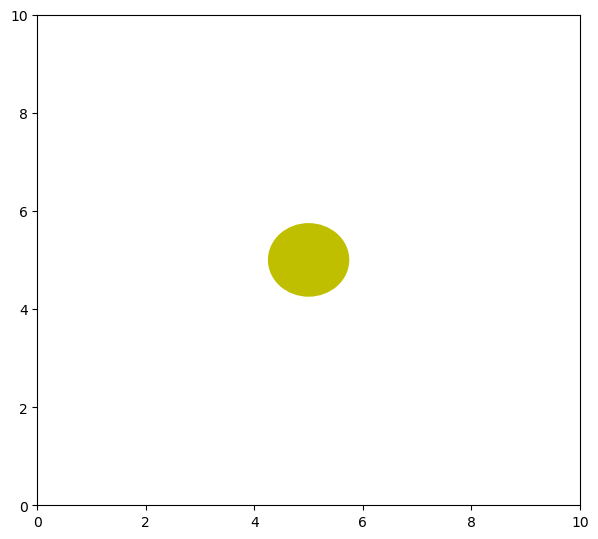

In [26]:
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 6.5)

ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
patch = plt.Circle((5, -5), 0.75, fc='y')

#patch = patches.Rectangle((0, 0), 5, 5, fc='y')
#rectangle = plt.Rectangle((10, 10), 100, 100, fc='r')
#plt.gca().add_patch(rectangle)


def init():
    patch.center = (5, 5)
    ax.add_patch(patch)
    return patch,

def animate(i):
    x, y = patch.center
    x = 5 + 3 * np.sin(np.radians(i))
    y = 5 + 3 * np.cos(np.radians(i))
    patch.center = (x, y)
    #patch.set_xy(x,y)
    return patch,

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=360, 
                               interval=20,
                               blit=True)

In [27]:
HTML(anim.to_html5_video())